<a href="https://colab.research.google.com/github/nadarsubash/Projects/blob/master/Clustering_KMeans_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Cluster

### Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).
###### @wikipedia

#### Import all the Libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Check the location of Jupyter Folder

In [0]:
import os
os.getcwd()

'/content'

#### Load the Dataset

In [0]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")

In [0]:
print(data.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [0]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Remove Fields not required for Cluster Analysis

In [0]:
XT = data.drop(["Channel", "Region"], axis=1)

In [0]:
XT.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


##### Alternate code to drop columns

In [0]:
X = data.drop(columns=["Channel", "Region"])

In [0]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### Split into Train and Test Files

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test = train_test_split(X,test_size=0.2)

In [0]:
print('--------Trainning Set Description-----------')
X_train.describe()

--------Trainning Set Description-----------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,11974.238636,5734.605114,7835.349432,3188.843750,2793.366477,1513.372159
std,12490.537263,6627.753929,8818.729128,5173.666957,4480.874668,2999.712228
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3294.000000,1587.750000,2141.500000,684.250000,256.750000,410.500000
50%,8504.000000,3655.500000,4630.500000,1567.000000,799.500000,931.000000
75%,17087.250000,7221.750000,10660.500000,3731.000000,3883.500000,1760.000000
max,112151.000000,54259.000000,67298.000000,60869.000000,38102.000000,47943.000000


In [0]:
print('--------Test Set Description-----------')
X_test.describe()

--------Test Set Description-----------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,12104.534091,6042.909091,8414.988636,2604.284091,3234.000000,1570.863636
std,13329.714472,9876.946416,11902.486099,3264.356271,5791.798839,1955.655607
min,9.000000,112.000000,218.000000,36.000000,9.000000,11.000000
25%,2635.000000,1505.750000,2292.750000,795.250000,281.250000,396.750000
50%,8432.000000,3488.500000,5076.000000,1474.000000,911.000000,1085.500000
75%,15940.000000,6432.750000,9680.000000,3073.000000,4161.500000,2035.000000
max,76237.000000,73498.000000,92780.000000,18028.000000,40827.000000,14351.000000


In [0]:
print(X_train.columns.values)

['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicassen']


#### Check for Unfilled column data

In [0]:
print(X.isna().head())
print(X.isna().sum())

   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  False  False    False   False             False       False
1  False  False    False   False             False       False
2  False  False    False   False             False       False
3  False  False    False   False             False       False
4  False  False    False   False             False       False
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


### Find the optimal cluster numbers K, using WCSS plot

##### The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares
###### @minitab

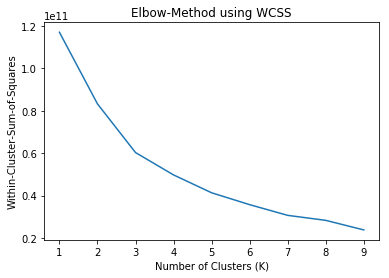

In [0]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow-Method using WCSS')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster-Sum-of-Squares')
plt.show()

#### we see big drop WCSS at 3 and 5. So we can take K between this range. Let's go with 5

In [0]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [0]:
clusters = kmeans.predict(X)

In [0]:
clusters

array([2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2,
       0, 1, 0, 0, 2, 0, 1, 3, 0, 2, 0, 0, 2, 2, 0, 0, 1, 3, 0, 0, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 3, 2, 0, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 1,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1, 3,
       2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 3, 0, 0, 2, 3, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 3, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 2, 2, 3, 3, 2, 2, 0, 2,
       2, 1, 1, 0, 1, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 0, 2, 2, 3, 0, 3, 3,
       2, 0, 0, 3, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0,

In [0]:
XT['Cluster']=clusters

In [0]:
XT.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [0]:
XT['Cluster'].value_counts()

2    251
0    110
1     56
3     23
Name: Cluster, dtype: int64

In [0]:
XT.sum(axis=0)

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
Cluster                1556
dtype: int64

In [0]:
file = pd.DataFrame(XFinal)

In [0]:
file.to_csv('Cluster-KMean-new.csv', index=False)

In [0]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25

# set bars
bars1 = X['Fresh']
bars2 = X['Milk']
bars3 = X['Grocery']
bars4 = X['Frozen']
bars5 = X['Detergents_Paper']
bars6 = X['Delicassen']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

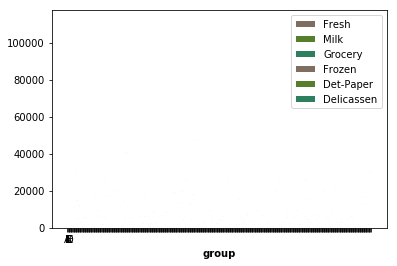

In [0]:
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Fresh')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Milk')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Grocery')
plt.bar(r4, bars4, color='#7f6d5f', width=barWidth, edgecolor='white', label='Frozen')
plt.bar(r5, bars5, color='#557f2d', width=barWidth, edgecolor='white', label='Det-Paper')
plt.bar(r6, bars6, color='#2d7f5e', width=barWidth, edgecolor='white', label='Delicassen')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C', 'D', 'E'])
 
# Create legend & Show graphic
plt.legend()
plt.show()
